In [93]:
import fitz
import numpy as np

# 打开PDF文件
pdf_name = "combined_2pi_ePeM_to_piPpiM_0,98-2,0GeV_dhmz19_.pdf"
pdf_page_index = 0  # 我们将提取第一页

# 打开PDF文件并提取指定页
pdf_document = fitz.open(pdf_name)
page = pdf_document.load_page(pdf_page_index)

# 获取页面的像素数据
pix = page.get_pixmap()

# 转换像素数据为Numpy数组
img_array = np.frombuffer(pix.samples, dtype=np.uint8).reshape(
    pix.height, pix.width, pix.n)

# 找到非白色像素的上边界和下边界
non_white_rows = np.any(img_array < 255, axis=2)
top_boundary = np.argmax(non_white_rows, axis=0)
bottom_boundary = img_array.shape[0] - \
    np.argmax(np.flip(non_white_rows, axis=0), axis=0)

# 获取只包含y值的上边界和下边界数组
y_values_top = pix.height-top_boundary[top_boundary != 0]
y_values_bottom = pix.height-bottom_boundary[bottom_boundary != pix.height]
y_values_center = (y_values_top+y_values_bottom)/2
y_values_err = y_values_top-y_values_bottom


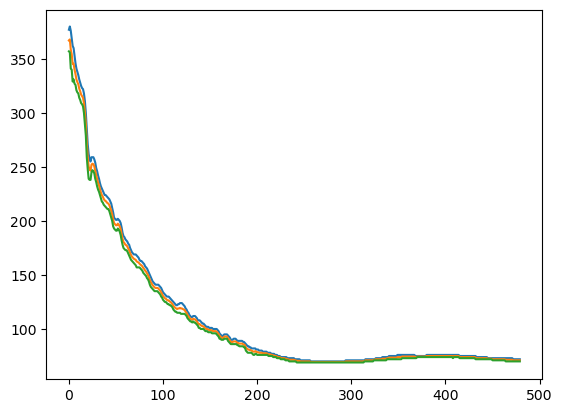

In [94]:
import matplotlib.pyplot as plt
plt.plot(y_values_top)
plt.plot(y_values_center)
plt.plot(y_values_bottom)


# (0.3,18.415)
# (0.72,1059.908)
************
# (0.72, 1059.908)
# (0.81,687.648)
***********
# (0.81,687.648)
# (0.98,72.868)
***********
# (0.98,72.868)
# (2,0.472)

In [95]:
import pandas as pd
start = 72.868
end = 0.472
d_y_old = abs(y_values_center[0]-y_values_center[-1])
d_y_new = abs(start-end)
x = np.linspace(0.98, 2.0, len(y_values_center), endpoint=True)
tmp = (y_values_center-y_values_center[0])/d_y_old*d_y_new
y = tmp+start
err = y_values_err/d_y_old*d_y_new
df = pd.DataFrame({"x": x, "y": y, "err": err})
print(df)
df.to_csv(pdf_name+".csv")

            x          y       err
0    0.980000  72.868000  4.891622
1    0.982129  73.112581  5.869946
2    0.984259  70.789061  8.560338
3    0.986388  69.810736  7.092851
4    0.988518  67.609507  8.071176
..        ...        ...       ...
475  1.991482   0.472000  0.489162
476  1.993612   0.472000  0.489162
477  1.995741   0.472000  0.489162
478  1.997871   0.472000  0.489162
479  2.000000   0.472000  0.489162

[480 rows x 3 columns]


In [ ]:
# (0.3,18.415)
# (0.72,1059.908)
###
# (0.72, 1059.908)
# (0.81,687.648)
##
# (0.81,687.648)
# (0.98,72.868)
##
# (0.98,72.868)
# (2,0.472)
